- 训练集长度分布

[8.000000e+01 3.290000e+02 8.840000e+02 1.000698e+04 1.310310e+05]


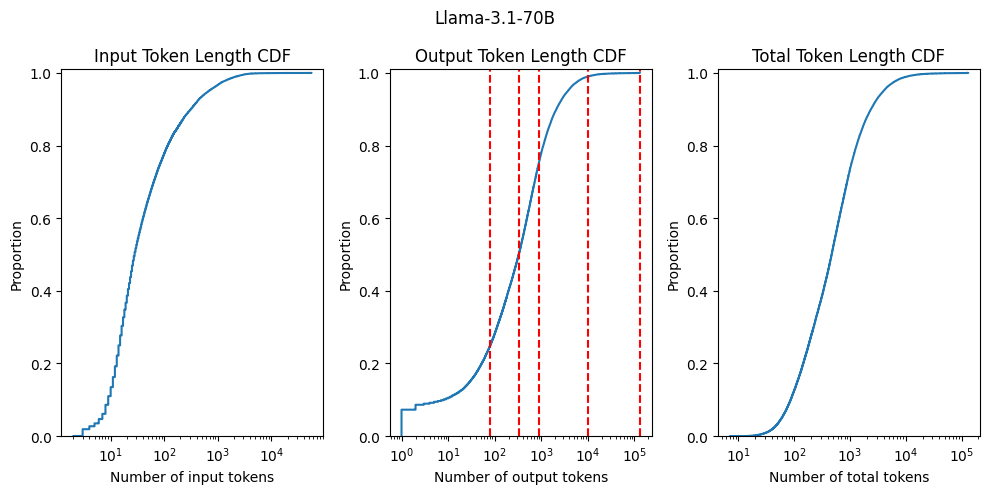

In [2]:
import datasets
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

model_name = "Llama-3.1-70B"
dataset_path = f"data/shareGPT/{model_name}/bert-base-multilingual-uncased/"

input_token_length_list = []
output_token_length_list = []
total_token_length_list = []

for split in ["train", "validation", "test"]:
    dataset = datasets.load_from_disk(os.path.join(dataset_path, split))
    input_token_length_list.extend(dataset["input_token_length"])
    output_token_length_list.extend(dataset["output_token_length"])

input_token_length_list = [l.item() for l in input_token_length_list]
output_token_length_list = [l.item() for l in output_token_length_list]
total_token_length_list = [input_token_length_list[i] + output_token_length_list[i] for i in range(len(input_token_length_list))]
output_tiles = np.percentile(output_token_length_list, [25, 50, 75, 99, 100])
print(output_tiles)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
sns.ecdfplot(input_token_length_list, ax=axes[0], log_scale=True)
axes[0].set_ylim(top=1.01)
axes[0].set_xlabel("Number of input tokens")
axes[0].set_title("Input Token Length CDF")

sns.ecdfplot(output_token_length_list, ax=axes[1], log_scale=True)
axes[1].set_ylim(top=1.01)
axes[1].set_xlabel("Number of output tokens")
axes[1].set_title("Output Token Length CDF")

for tile in output_tiles:
    axes[1].axvline(tile, color="red", linestyle="--")

sns.ecdfplot(total_token_length_list, ax=axes[2], log_scale=True)
axes[2].set_ylim(top=1.01)
axes[2].set_xlabel("Number of total tokens")
axes[2].set_title("Total Token Length CDF")

fig.suptitle(model_name)
plt.tight_layout()

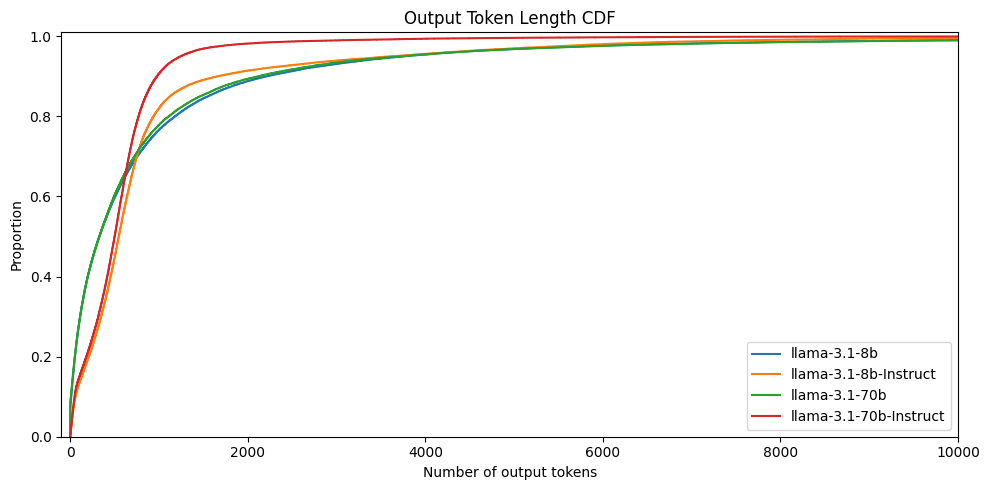

In [30]:
import datasets
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

dataset_list = [
    ("Llama-2-7b-chat-hf", "data/shareGPT/Llama-2-7b-chat-hf/bert-base-uncased"),
    ("Llama-2-13b-chat-hf", "data/shareGPT/Llama-2-13b-chat-hf/bert-base-uncased"),
    ("Llama-2-70b-chat-hf", "data/Llama-2-70b-chat-hf/shareGPT/bert-base-uncased/"),
    ("Llama-3.1-8B", "data/shareGPT/Llama-3.1-8B/bert-base-uncased/"),
    ("Llama-3.1-8B-Instruct", "data/shareGPT/Llama-3.1-8B-Instruct/bert-base-uncased/"),
    ("Llama-3.1-70B", "data/shareGPT/llama-3.1-70b/bert-base-uncased/"),
    ("Llama-3.1-70B-Instruct", "data/shareGPT/Llama-3.1-70B-Instruct/bert-base-uncased/"),
]


fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for model_name, dataset_path in dataset_list:
    output_token_length_list = []
    for split in ["train", "validation", "test"]:
        dataset = datasets.load_from_disk(os.path.join(dataset_path, split))
        output_token_length_list.extend(dataset["output_token_length"])
    output_token_length_list = [l.item() for l in output_token_length_list]
    sns.ecdfplot(output_token_length_list, ax=ax, label=model_name)

ax.set_xlim(left=-100, right=10000)
ax.set_ylim(top=1.01)
ax.set_xlabel("Number of output tokens")
ax.set_title("Output Token Length CDF")

plt.legend()
plt.tight_layout()

[8.00000e+01 3.29000e+02 9.33000e+02 9.66362e+03 1.30988e+05]


<Axes: ylabel='Proportion'>

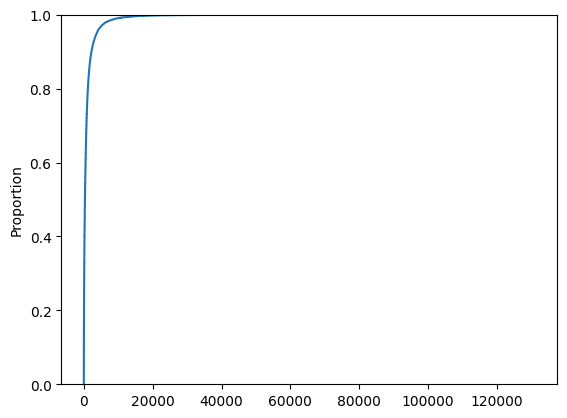

In [4]:
import datasets
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

dataset_path = "data/shareGPT/Llama-3.1-8B/bert-base-uncased"

input_token_length_list = []
output_token_length_list = []
total_token_length_list = []

for split in ["train", "validation", "test"]:
    dataset = datasets.load_from_disk(os.path.join(dataset_path, split))
    input_token_length_list.extend(dataset["input_token_length"])
    output_token_length_list.extend(dataset["output_token_length"])

input_token_length_list = [l.item() for l in input_token_length_list]
output_token_length_list = [l.item() for l in output_token_length_list]
total_token_length_list = [input_token_length_list[i] + output_token_length_list[i] for i in range(len(input_token_length_list))]
output_tiles = np.percentile(output_token_length_list, [25, 50, 75, 99, 100])
print(output_tiles)

sns.ecdfplot(output_token_length_list)

- 可视化模型测试结果

Latency mean: 3.948 ms, Latency max: 1290.891 ms


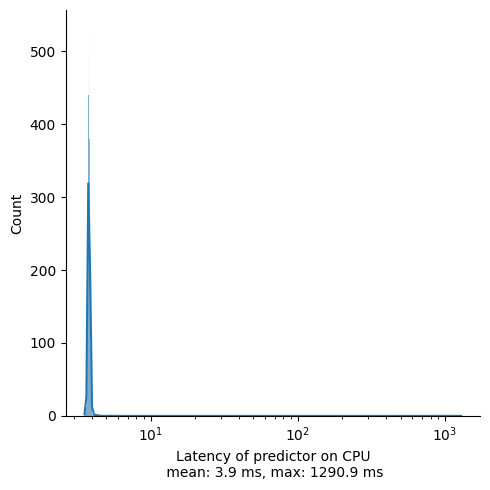

In [7]:
# latency测试
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_name = "Llama-3.1-70B"
result_path = f"results/shareGPT/{model_name}/bert-base-multilingual-uncased/"

df = pd.read_csv(os.path.join(result_path, "output.csv"))
latency = df["latency"].to_list()
latency_mean = np.mean(latency)
latency_max = np.max(latency)
print(f"Latency mean: {latency_mean:.3f} ms, Latency max: {latency_max:.3f} ms")

output_graph = sns.displot(latency, kde=True, log_scale=True)
output_graph.set_xlabels(f"Latency of predictor on CPU\n mean: {latency_mean:.1f} ms, max: {latency_max:.1f} ms")
output_graph.tight_layout()
# g.savefig(os.path.join(result_path, "latency_distribution.png"))
# g.savefig(os.path.join(result_path, "latency_distribution.svg"))

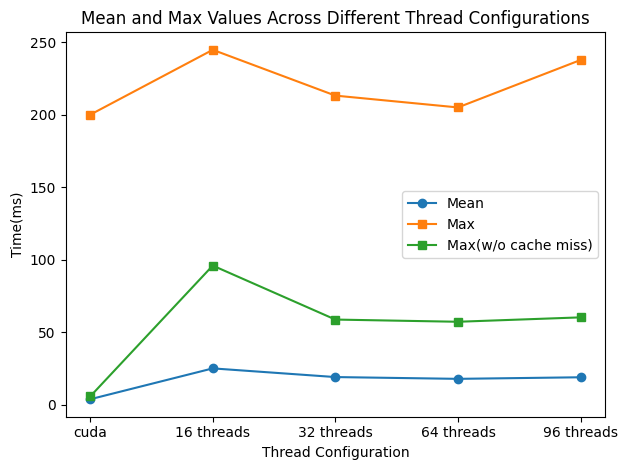

In [7]:
import matplotlib.pyplot as plt

# 数据
name_list = [
    "cuda",
    "16 threads",
    "32 threads",
    "64 threads",
    # "80 threads",
    "96 threads",
    # "128 threads",
]
mean_list = [
    3.9219,
    25.2006,
    19.2179,
    17.9880,
    # 19.6564,
    19.0749,
    # 29.6545,
]
max_list = [
    200.0976,
    244.8591,
    213.2789,
    205.1219,
    # 253.6184,
    237.8212,
    # 1952.4241,
]
max_calculate_list = [
    5.842,
    96.085,
    58.864,
    57.348,
    # 64.956,
    60.376,
]

# 创建图表
fig, ax = plt.subplots()

# 绘制mean折线
ax.plot(name_list, mean_list, label="Mean", marker="o")

# 绘制max折线
ax.plot(name_list, max_list, label="Max", marker="s")

ax.plot(name_list, max_calculate_list, label="Max(w/o cache miss)", marker="s")

# 添加标题和坐标轴标签
ax.set_title("Mean and Max Time Across Different Thread Configurations")
ax.set_xlabel("Thread Configuration")
ax.set_ylabel("Time(ms)")

# 显示图例
ax.legend()

# 调整布局以确保标签完全显示
plt.tight_layout()

# 显示图表
plt.show()

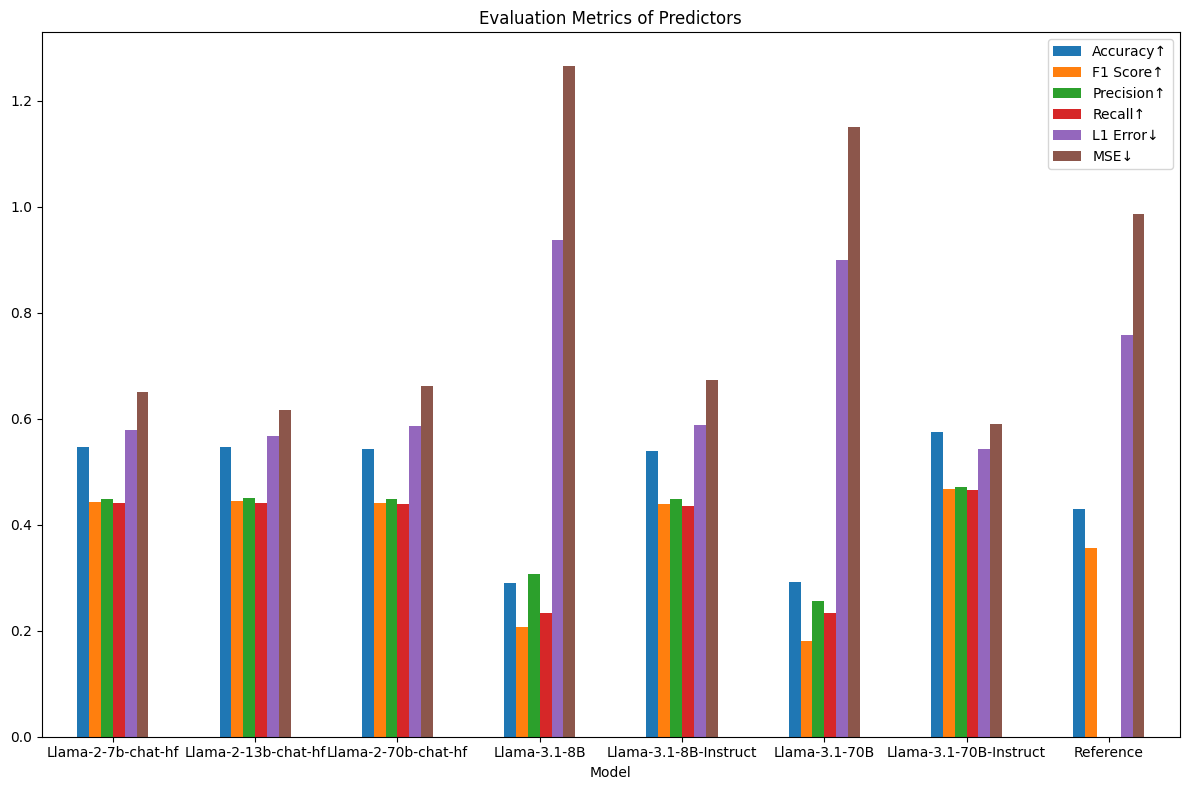

In [12]:
# 模型评价指标
import pandas as pd
import matplotlib.pyplot as plt

metrics_list = [
    ("Llama-2-7b-chat-hf", "results/shareGPT/Llama-2-7b-chat-hf/bert-base-uncased/metrics.csv"),
    ("Llama-2-13b-chat-hf", "results/shareGPT/Llama-2-13b-chat-hf/bert-base-uncased/metrics.csv"),
    ("Llama-2-70b-chat-hf", "results/shareGPT/Llama-2-70b-chat-hf/bert-base-uncased/metrics.csv"),
    ("Llama-3.1-8B", "results/shareGPT/Llama-3.1-8B/bert-base-uncased/metrics.csv"),
    ("Llama-3.1-8B-Instruct", "results/shareGPT/Llama-3.1-8B-Instruct/bert-base-uncased/metrics.csv"),
    ("Llama-3.1-70B", "results/shareGPT/Llama-3.1-70B/bert-base-multilingual-uncased/metrics.csv"),
    ("Llama-3.1-70B-Instruct", "results/shareGPT/Llama-3.1-70B-Instruct/bert-base-uncased/metrics.csv"),
]

df_list = []
for _, file in metrics_list:
    tmp = pd.read_csv(file)
    df_list.append(tmp)


df = pd.concat(df_list, ignore_index=True)
df["Model"] = [model_name for model_name, _ in metrics_list]

reference_df = pd.DataFrame(
    {
        "Model": ["Reference"],
        "ACC": [0.429],
        "F1": [0.3563],
        "Precision": [0.0],
        "Recall": [0.0],
        "L1": [0.7587],
        "MSE": [0.9859],
    }
)
df = pd.concat([df, reference_df], ignore_index=True)

df = df.rename(columns={"ACC": "Accuracy", "L1": "L1 Error", "MSE": "MSE", "F1": "F1 Score"})
ax = df.plot(x="Model", y=["Accuracy", "F1 Score", "Precision", "Recall", "L1 Error", "MSE"], kind="bar", figsize=(12, 8))
plt.xticks(rotation=0)
ax.title.set_text("Evaluation Metrics of Predictors")
ax.legend(
    ["Accuracy\u2191", "F1 Score\u2191", "Precision\u2191", "Recall\u2191", "L1 Error\u2193", "MSE\u2193"],
    bbox_to_anchor=(1, 1),
)
plt.tight_layout()

/data/home/zhengzy/anaconda3/envs/power-aware/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


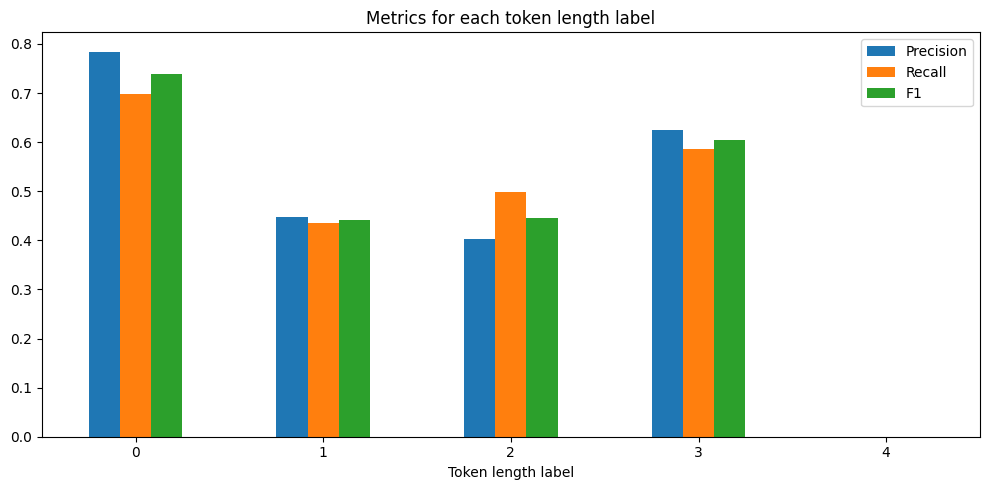

In [14]:
# 模型评价指标
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
import os

result_path = "results/shareGPT/Llama-3.1-70B-Instruct/bert-base-multilingual-uncased/"
df = pd.read_csv(os.path.join(result_path, "output.csv"))
multi_precision = metrics.precision_score(df["label"], df["cls_predict"], average=None)
multi_recall = metrics.recall_score(df["label"], df["cls_predict"], average=None)
multi_f1 = metrics.f1_score(df["label"], df["cls_predict"], average=None)

df = pd.DataFrame({"Token length label": [0, 1, 2, 3, 4], "Precision": multi_precision, "Recall": multi_recall, "F1": multi_f1})

ax = df.plot(x="Token length label", y=["Precision", "Recall", "F1"], kind="bar", figsize=(10, 5))
plt.xticks(rotation=0)
ax.title.set_text("Metrics for each token length label")
plt.tight_layout()